In [1]:
!pip install h5py

In [1]:
from util import Utils
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from scipy import interp
import numpy as np
from sklearn.metrics import classification_report


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
h5f = h5py.File('./SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


h5f.close()

In [3]:
len(X_train), len(X_test),X_train.shape, X_test.shape

(42000, 18000, (42000, 32, 32), (18000, 32, 32))

In [4]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

X_train = X_train/255
X_test = X_test/255

In [5]:
svh_x_train, svh_x_test, svh_y_train, svh_y_test = X_train, X_test, y_train, y_test

In [6]:
svh_X_train, svh_X_val, svh_Y_train, svh_y_val = train_test_split(svh_x_train, svh_y_train, test_size=1/3, random_state=42)

In [ ]:
best_svh_model = Utils.find_best_rf_parameters(svh_x_train, svh_y_train)

In [7]:
rf_model, rf_accuracy, rf_f_score  = Utils.accuracy_measure_rf(svh_x_train, svh_y_train, 
                          svh_x_test, svh_y_test, 
                          n_estimators = 100, criterion = 'entropy', max_depth = 50, max_features = 'sqrt')

--- 416.7017867565155 seconds ---
Filename: /home/ahmad/Desktop/Ai-Lab/Case Study 2/util.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    47    675.8 MiB    675.8 MiB           1       @profile
    48                                             def accuracy_measure_rf(X_train, y_train, X_test, y_test, n_estimators=50, criterion='entropy', max_depth=10, max_features='log2'):
    49    675.8 MiB      0.0 MiB           1           import time
    50    675.8 MiB      0.0 MiB           1           from sklearn.ensemble import RandomForestClassifier
    51    675.8 MiB      0.0 MiB           1           from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    52                                             
    53    675.8 MiB      0.0 MiB           1           start_time = time.time()
    54    675.8 MiB      0.0 MiB           1           rf_model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_fea

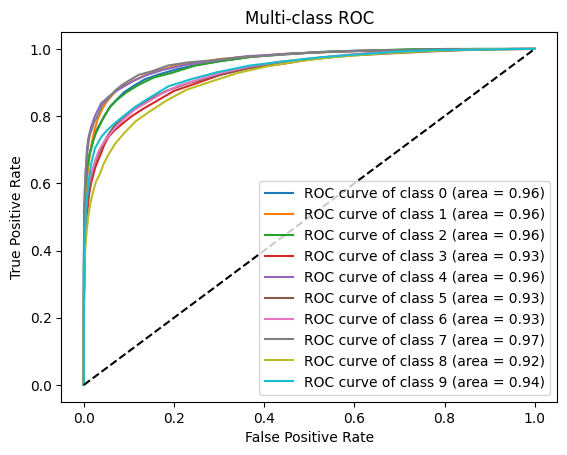

In [11]:
y_test_bin = label_binarize(svh_y_test, classes=np.unique(svh_y_test))
n_classes = y_test_bin.shape[1]

rf_probs = rf_model.predict_proba(svh_x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), rf_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [12]:
rf_report = classification_report(svh_y_test, rf_model.predict(svh_x_test), digits = 5)
print(rf_report)


              precision    recall  f1-score   support

           0    0.71850   0.80485   0.75923      1814
           1    0.70685   0.82440   0.76111      1828
           2    0.79634   0.74820   0.77152      1803
           3    0.66667   0.69808   0.68201      1719
           4    0.77807   0.80684   0.79220      1812
           5    0.73353   0.69287   0.71262      1768
           6    0.73432   0.70306   0.71835      1832
           7    0.81946   0.80586   0.81260      1808
           8    0.74790   0.64018   0.68986      1812
           9    0.74737   0.70843   0.72738      1804

    accuracy                        0.74367     18000
   macro avg    0.74490   0.74328   0.74269     18000
weighted avg    0.74524   0.74367   0.74304     18000



In [ ]:
best_xgb_model = Utils.find_best_xgb_parameters(svh_X_train, svh_Y_train, svh_X_val, svh_y_val)

In [8]:
xgb_model, xgb_accuracy, xgb_f_score = Utils.accuracy_measure_xgb(svh_x_train, svh_y_train.ravel(), svh_x_test, svh_y_test.ravel(),
                                                                  n_estimators = 100, learning_rate = 0.1, max_depth = 50)

--- 1066.8365607261658 seconds ---
Filename: /home/ahmad/Desktop/Ai-Lab/Case Study 2/util.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    86    675.7 MiB    675.7 MiB           1       @profile
    87                                             def accuracy_measure_xgb(X_train, y_train, X_test, y_test, n_estimators=50, learning_rate=0.1, max_depth=10, subsample=0.5, colsample_bytree=0.5):
    88    675.7 MiB      0.0 MiB           1           import time
    89    675.7 MiB      0.0 MiB           1           import xgboost as xgb
    90    675.7 MiB      0.0 MiB           1           from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    91                                             
    92    675.7 MiB      0.0 MiB           1           start_time = time.time()
    93    675.7 MiB      0.0 MiB           1           xgb_model = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, subsample=subsamp

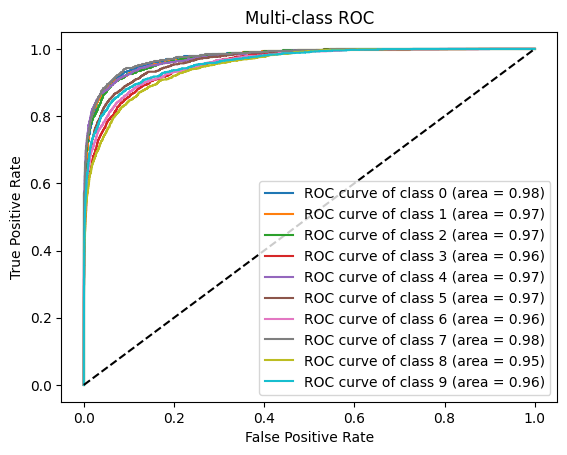

In [13]:
xgb_probs = xgb_model.predict_proba(svh_x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], xgb_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), rf_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [14]:
xgb_report = classification_report(svh_y_test, xgb_model.predict(svh_x_test), digits = 5)
print(xgb_report)

              precision    recall  f1-score   support

           0    0.75705   0.81422   0.78459      1814
           1    0.76647   0.84026   0.80167      1828
           2    0.82385   0.76262   0.79205      1803
           3    0.71264   0.71844   0.71553      1719
           4    0.80402   0.81733   0.81062      1812
           5    0.75943   0.75170   0.75554      1768
           6    0.75099   0.72107   0.73573      1832
           7    0.81527   0.81527   0.81527      1808
           8    0.75579   0.70199   0.72790      1812
           9    0.75458   0.75333   0.75395      1804

    accuracy                        0.76994     18000
   macro avg    0.77001   0.76962   0.76928     18000
weighted avg    0.77027   0.76994   0.76957     18000

